**To perform the EDA on CREDIT data, we will be following these steps**:
1. Problem Statement
2. Data Loading
3. Missing Values handling of Application Dataset
4. Outlier Analysis
5. Missing Values handling of Previous Application Dataset
6. Data imbalance
7. Univariate Analysis  
8. Top 10 correlations
9. Bivariate Analysis
10. Analysis on merged dataset
11. Recommendation and conclusion


# Problem Statement:

1. Aim is to identify patterns which indicate if a client had difficulty paying their installments which will help the bank in taking following actions:
    1. Denying the loan
    2. Reducing the amount of loan
    3. Lending at higher interest rate to risky applicants etc
2. Identifying the correlation between dependent variables and Target variable
3. To ensure that consumers who are capable of paying the loan are not rejected



# Data Loading

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Shalini\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


Read 'application_data.csv' data in inp0 and 'previous_application.csv' data in inp1

In [2]:
#Read 'application_data.csv' data in inp0 
inp0= pd.read_csv("application_data.csv")

In [3]:
#Print the head of the data frame.
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Read 'previous_application.csv' data in inp1
inp1 = pd.read_csv("previous_application.csv")

In [5]:
#Print the head of the data frame.
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
inp0.shape

(307511, 122)

In [7]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#print the information of variables to check their data types. 'verbose=True' will provide info of all the data types
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Missing Values handling of Application Dataset

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. We will explore more to get the data types after reading the data frame. 


In [9]:
# get all the columns with object data type
inp0.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [10]:
# get all the columns with int data type
inp0.select_dtypes(include=['int64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [11]:
# get all the columns with float data type#
inp0.select_dtypes(include=['float64']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

### Impute/Remove missing values

In [12]:
#count the missing values in dataframe.
inp0.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

As there are a lot of columns in dataframe, we will check for nulls by data type to get clearer view

In [13]:
inp0.select_dtypes(include=['float64']).isnull().sum().sort_values(ascending = False).head(50)

COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [14]:
inp0.select_dtypes(include=['int64']).isnull().sum().sort_values(ascending = False)

SK_ID_CURR                     0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_3                0
LIVE_CITY_NOT_WORK_CITY        0
TARGET                         0
REG_CITY_NOT_WORK_CITY         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_

In [15]:
inp0.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)

FONDKAPREMONT_MODE            210295
WALLSMATERIAL_MODE            156341
HOUSETYPE_MODE                154297
EMERGENCYSTATE_MODE           145755
OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
dtype: int64

We observed that:
1. There are zero columns with null values in integer type columns
2. 6 Category columns have missing values
3. More than 50 float type columns have missing values

In [16]:
#Calculate the percentage of missing values.
dfnull = 100 * inp0.isnull().sum().sort_values(ascending = False)/len(inp0)

In [17]:
# count the number of columns where more than 40% values are missing
dfnull[dfnull > 40].count()

49

In [18]:
# store the columns with more than 40% missing values in a variable
col_drop = dfnull[dfnull > 40].index

In [19]:
# we will drop columns with null values of more than 40%
inp0.drop(labels = col_drop,axis=1,inplace = True)

In [20]:
inp0.shape

(307511, 73)

### Treat the missing values

In [21]:
# check for missing values in categorical columns
inp0.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE               96391
NAME_TYPE_SUITE                1292
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [22]:
dfnull2 = 100 * inp0.select_dtypes(include=['float64']).isnull().sum().sort_values(ascending = False)/len(inp0)
dfnull2

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_CREDIT                     0.000000
DAYS_REGISTRATION              0.000000
REGION_POPULATION_RELATIVE     0.000000
AMT_INCOME_TOTAL               0.000000
dtype: float64

Observe the missing values

In [23]:
Null_columns = dfnull2[dfnull2 > 0].index
for i in Null_columns:
    print(f'----------------{i}----------------')
    print(inp0[i].value_counts())
    print('----------------end----------------')

----------------EXT_SOURCE_3----------------
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64
----------------end----------------
----------------AMT_REQ_CREDIT_BUREAU_YEAR----------------
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
----------------end----------------
----------------AMT_REQ_CREDIT_BUREAU_QRT----------------
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0     

#### Handle the missing numeric values
1. As we can see that columns - 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' have discrete numeric values, so we will impute these discrete numeric missing values with **mode** values
2. We will impute continuous missing values in EXT_SOURCE_3, EXT_SOURCE_2 with **median** values


In [24]:
dfnull2[dfnull2 > 0].index

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [25]:
df_numeric =['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','AMT_ANNUITY']


In [26]:
for i in df_numeric:
    #print(f'----------------{i}----------------') 
    #print(inp0[i].isnull().sum())
    inp0[i].fillna(inp0[i].mode()[0], inplace =True)
    #print(inp0[i].isnull().sum())
    #print('----------------end----------------')

We will impute continuous missing values EXT_SOURCE_3, EXT_SOURCE_2 with median values

In [27]:
inp0['EXT_SOURCE_3'].fillna(inp0['EXT_SOURCE_3'].median(), inplace =True)
inp0['EXT_SOURCE_2'].fillna(inp0['EXT_SOURCE_2'].median(), inplace =True)

OCCUPATION_TYPE, NAME_TYPE_SUITE have some missing values

In [28]:
inp0.NAME_TYPE_SUITE.value_counts(normalize = True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [29]:
inp0.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

As most of the values in NAME_TYPE_SUITE are **Unaccompanied**(81%), we will fill the missing values with **Unaccompanied**

In [30]:
inp0['NAME_TYPE_SUITE'].fillna(inp0.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [31]:
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [33]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [34]:
inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
inp0['CODE_GENDER'] = inp0['CODE_GENDER'].replace('XNA','F')

#inp0[i].fillna(inp0[i].mode()[0], inplace =True)

In [36]:
inp0.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [37]:
for i in inp0.columns:
    if "FLAG" in i:
        print(inp0[i].value_counts())

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
1    307510
0         1
Name: FLAG_MOBIL, dtype: int64
1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64
0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64
1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64
0    221080
1     86431
Name: FLAG_PHONE, dtype: int64
0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64
0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64
1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64
0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64
0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64
0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64
0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64
0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64
0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64
0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int

We would convert FLAG_OWN_CAR, FLAG_OWN_REALTY values to 0,1 for ease of analysis

In [38]:
inp0['FLAG_OWN_CAR'] = np.where(inp0['FLAG_OWN_CAR']=='Y', 1 , 0)
inp0['FLAG_OWN_REALTY'] = np.where(inp0['FLAG_OWN_REALTY']=='Y', 1 , 0)

We will check values of categorical columns to see if there are any random values. 

In [39]:
df_col = inp0.select_dtypes(include=['object']).columns

In [40]:
for i in df_col:
    print(f'----------------{i}----------------')
    print(inp0.select_dtypes(include=['object'])[i].value_counts())
    print('----------------end----------------')

----------------NAME_CONTRACT_TYPE----------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------end----------------
----------------CODE_GENDER----------------
F    202452
M    105059
Name: CODE_GENDER, dtype: int64
----------------end----------------
----------------NAME_TYPE_SUITE----------------
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
----------------end----------------
----------------NAME_INCOME_TYPE----------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------------end----------------
--------------

In [41]:
#for i in df_col:
#    print(f'----------------{i}----------------')
#    print(inp0.select_dtypes(include=['object'])[inp0.NAME_INCOME_TYPE=='Pensioner'][i].value_counts())
#    print('----------------end----------------')

There are some missing values in OCCUPATION_TYPE and 'XNA' in ORGANIZATION_TYPE.As NAME_INCOME_TYPE,  OCCUPATION_TYPE and ORGANIZATION_TYPE are related to job profile of the customer, we would check if there is any relation in these three columns.

In [42]:
df_col = [ 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',   'ORGANIZATION_TYPE']

In [43]:
for i in df_col:
    print(f'----------------{i}----------------')
    print(inp0.select_dtypes(include=['object'])[inp0.ORGANIZATION_TYPE=='XNA'][i].value_counts())
    print('----------------end----------------')

----------------NAME_INCOME_TYPE----------------
Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64
----------------end----------------
----------------OCCUPATION_TYPE----------------
Cleaning staff    2
Name: OCCUPATION_TYPE, dtype: int64
----------------end----------------
----------------ORGANIZATION_TYPE----------------
XNA    55374
Name: ORGANIZATION_TYPE, dtype: int64
----------------end----------------


In [44]:
inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Pensioner'].isnull().sum()
#inp0['OCCUPATION_TYPE'].isnull().sum()
55357/96391

0.5742963554688716

We can see above that customer with ORGANIZATION_TYPE 'XNA' has NAME_INCOME_TYPE Pensioner, so we would replace XNA with Pensioner. 
57% values of occupation type are missing where NAME_INCOME_TYPE is Pensioner. So we would replace these values with Pensioner

In [45]:
inp0['ORGANIZATION_TYPE'] = inp0['ORGANIZATION_TYPE'].replace('XNA','Pensioner')

In [46]:
inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Pensioner'] ='Pensioner' #.isnull().sum()
#inp0.NAME_INCOME_TYPE.isnull().sum()

We will check for other OCCUPATION_TYPE missing columns mapping with NAME_INCOME_TYPE

In [47]:
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Student'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Unemployed'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Working'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Businessman'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='State servant'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Commercial associate'].isnull().sum())
print(inp0['OCCUPATION_TYPE'][inp0.NAME_INCOME_TYPE=='Maternity leave'].isnull().sum())

5
22
24920
2
3787
12297
1


As we see above that most of the remaining missing values customrs are doing job or business, so we would replace these missing values with 'Working'

In [48]:
inp0['OCCUPATION_TYPE'].fillna('Working', inplace=True)

In [49]:
inp0['ORGANIZATION_TYPE'] = inp0['ORGANIZATION_TYPE'].replace('XNA','Pensioner')

In [50]:
# Check for missing values in complete dataset
inp0.isnull().sum().sort_values(ascending = False)

SK_ID_CURR                    0
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

### Drop the columns which don't add any value.


In [51]:
#Here columns starting with FLAG_DOCUMENT are not significant for our analysis. 
# so we would drop these columns
drop_col = []
for i in inp0.columns:
    if "FLAG_D" in i:
        #print(i)
        drop_col.append(i)
drop_col   #,axis=1,inplace=True)
inp0.drop(labels=drop_col,axis=1,inplace=True)

In [52]:
#Columns with phone related FLAG are not significant for our analysis. 
# so we would drop these columns
drop_col = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
inp0.drop(labels=drop_col,axis=1,inplace=True)


We saw that all the columns with days count have negative values.We would change it to positive values for ease of analysis

In [53]:
day_cols = [i for i in inp0 if i.startswith('DAYS')]
day_cols
inp0[day_cols]= abs(inp0[day_cols])

We will make divide customer into buckets of income, credit type and age group 

In [54]:
inp0['AMT_INCOME_TYPE'] = pd.qcut(inp0.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
inp0['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [55]:
inp0['AMT_CREDIT_TYPE'] = pd.qcut(inp0.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
inp0['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [56]:
inp0['DAYS_BIRTH']= (inp0['DAYS_BIRTH']/365).astype(int)    # Converting 
inp0['DAYS_BIRTH'].unique()
inp0['AGE_GROUP']=pd.cut(inp0['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [57]:
#inp0.info()
inp0['AGE_GROUP'].unique()
#inp0.head()

['Very_Young', 'Middle_Age', 'Young', 'Senior_Citizen']
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

# Outlier Analysis

We would plot boxplot for all the numerical columns and check for outliers.

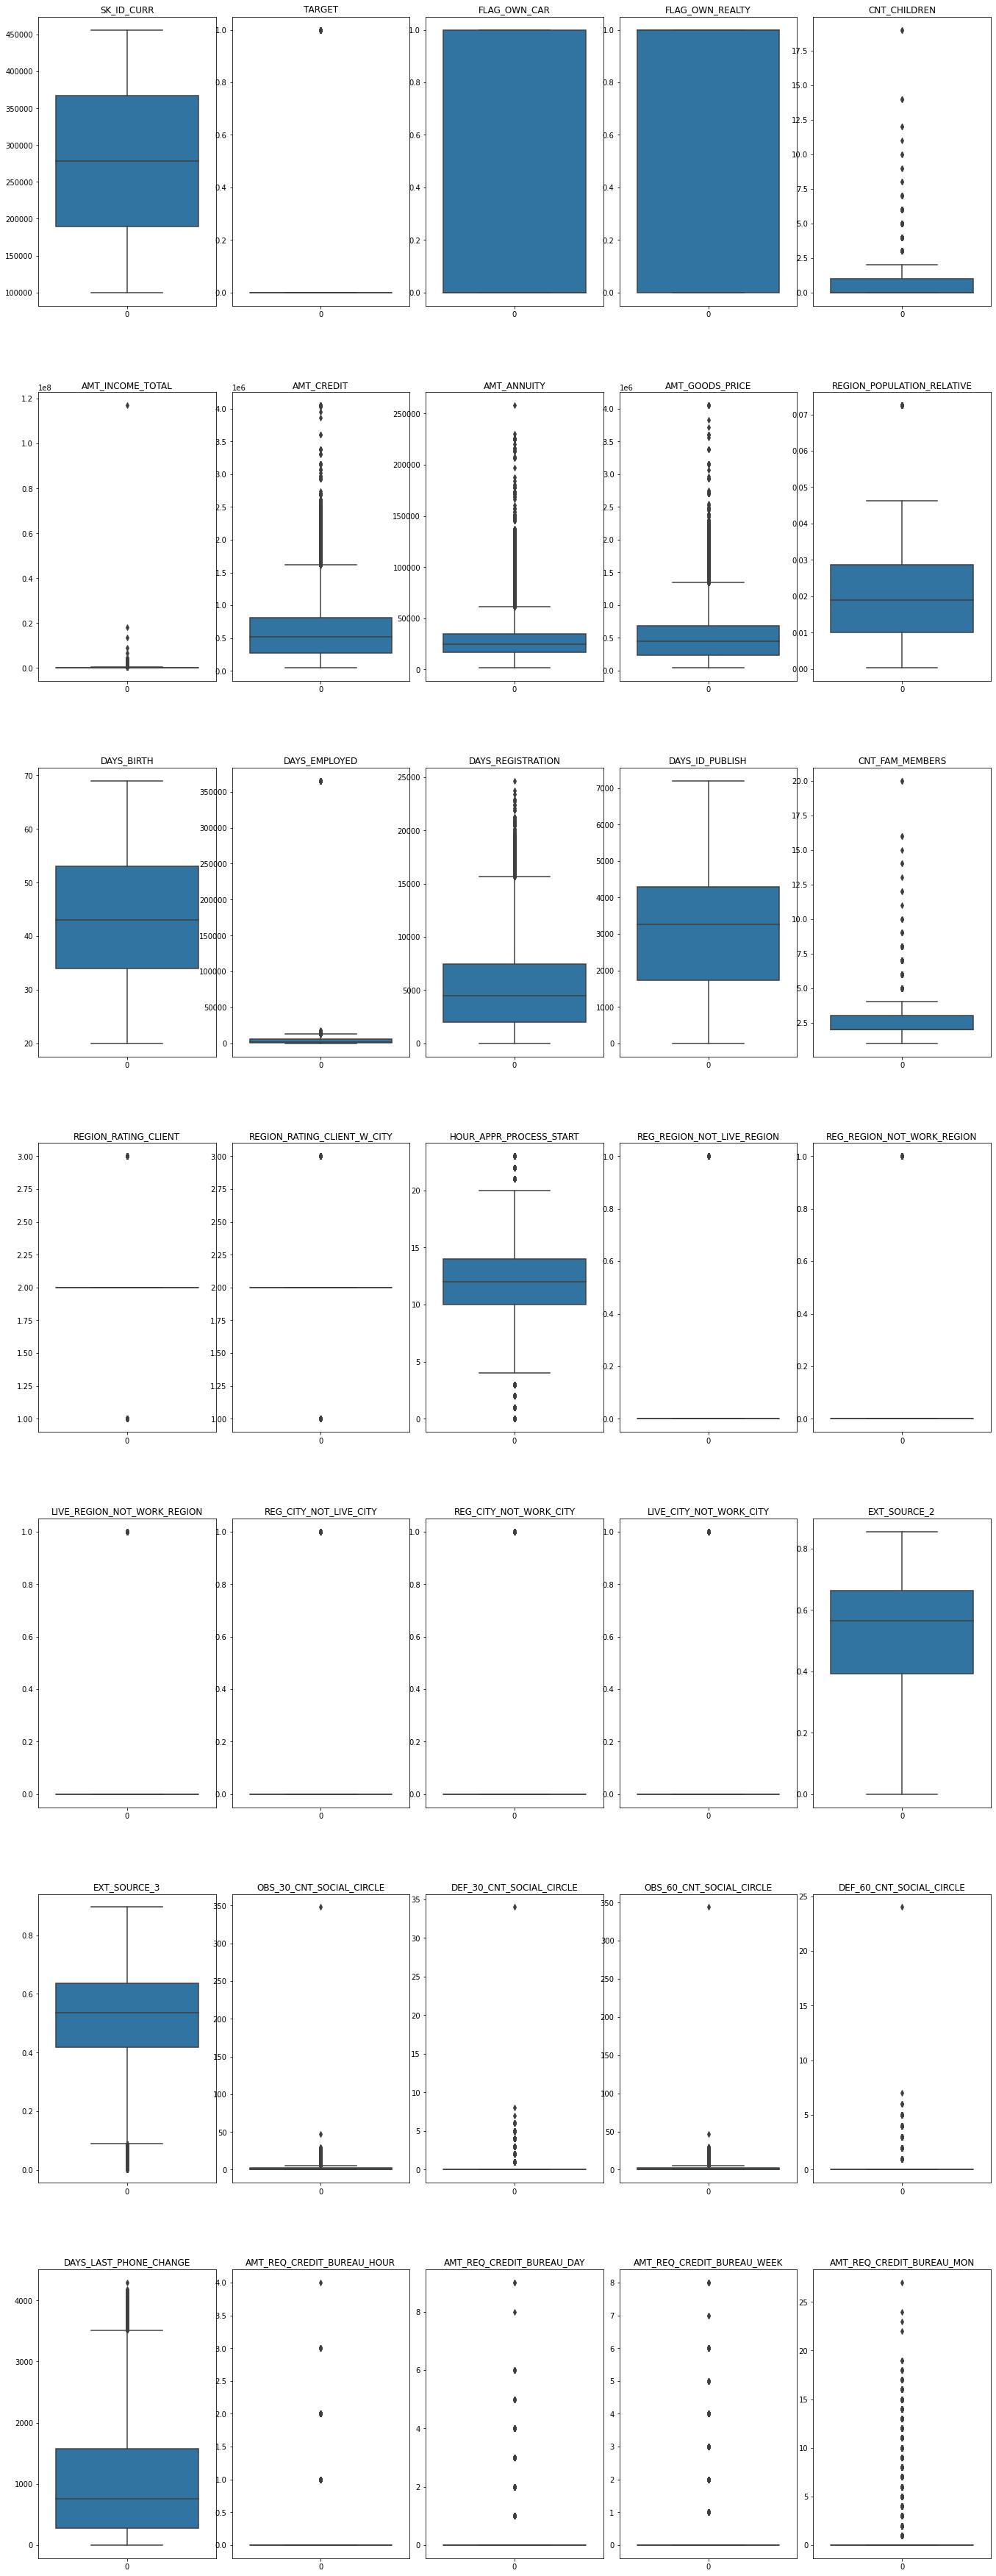

In [58]:
numerical_col = inp0.select_dtypes(include='number').columns
len(numerical_col)
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                  
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(),numerical_col):      
    sns.boxplot(inp0[column],ax=ax).set_title(column)  


In [59]:
#inp0['CNT_CHILDREN'].value_counts()

for i in numerical_col:
    print(inp0[i].value_counts())

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
0    282686
1     24825
Name: TARGET, dtype: int64
0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64
1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5     

## Insights

1. **AMT_INCOME_TOTAL,AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE** are having much higher values than IQR, but these values shouldn't be considered as outliers as these are possible values.
2. Third quartile of **DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE** is larger as compared to the First quartile and all have a large number of outliers.
3. IQR for **DAYS EMPLOYED** is very slim. Most of the values are present below 25000. And an outlier is present 375000.
4. **DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3** don’t have any outliers.
5. Boxplot for **DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR** are very slim and have a large number of outliers.


# Missing Values imputation of Previous Application Dataset

In [60]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
inp1.shape

(1670214, 37)

In [62]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing values detection

In [63]:
# calculate % of missing values in previous application dataset
100*inp1.isnull().sum().sort_values(ascending=False)/len(inp1)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [64]:
null_col = 100*inp1.isnull().sum().sort_values(ascending=False)/len(inp1)

In [65]:
# store all the columns with more than 40% missing values in a variable and drop these columns
col_drop = null_col[null_col > 40].index
inp1.drop(labels = col_drop,axis=1,inplace = True)

In [66]:

inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [67]:
# Check for remaining missing values
inp1.isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

AMT_GOODS_PRICE, AMT_ANNUITY, PRODUCT_COMBINATION,CNT_PAYMENT have some missing values. We will analyse these columns and fill the missing values accordingly

In [68]:
inp1['AMT_GOODS_PRICE'].value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

We will plot by filling missing values of AMT_GOODS_PRICE with mean, median, mode of AMT_GOODS_PRICE and see which plot follows the same distribution as AMT_GOODS_PRICE and select the best fit function to fill the missing values


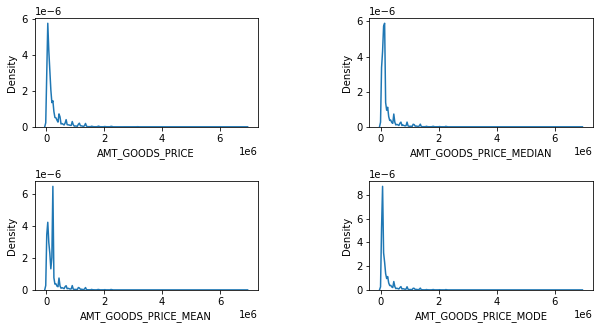

In [69]:
inp1['AMT_GOODS_PRICE_MEDIAN'] = inp1['AMT_GOODS_PRICE'].fillna(inp1['AMT_GOODS_PRICE'].median())
inp1['AMT_GOODS_PRICE_MEAN']   = inp1['AMT_GOODS_PRICE'].fillna(inp1['AMT_GOODS_PRICE'].mean())
inp1['AMT_GOODS_PRICE_MODE']   = inp1['AMT_GOODS_PRICE'].fillna(inp1['AMT_GOODS_PRICE'].mode()[0])
plt_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

plt.figure(figsize=(10,5))

for i, col in enumerate(plt_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=inp1,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

As plot with median follows the same distribution as AMT_GOODS_PRICE, we will use this function to fill the missing values

In [70]:
inp1['AMT_GOODS_PRICE'] = inp1['AMT_GOODS_PRICE'].fillna(inp1['AMT_GOODS_PRICE'].median())


In [71]:
inp1['AMT_ANNUITY'].value_counts()


2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

We will fill missing values in AMT_ANNUITY with median

In [72]:
inp1['AMT_ANNUITY'] = inp1['AMT_ANNUITY'].fillna(inp1['AMT_ANNUITY'].median())


In [73]:
inp1['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

As PRODUCT_COMBINATION is a categorical variable and missing values are very less, we will impute this missing values with mode

In [74]:
inp1['PRODUCT_COMBINATION'] = inp1['PRODUCT_COMBINATION'].fillna(inp1['PRODUCT_COMBINATION'].mode()[0])


In [75]:
inp1['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

CNT_PAYMENT values would be 0 if loan wasn't given. We will extract the mapping of missing CNT_PAYMENT values and NAME_CONTRACT_STATUS and check if CNT_PAYMENT is 0 for the conditions, where loan wasn't provided

In [76]:
inp1[inp1['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)


NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

From above, we found out that CNT_PAYMENT is missing where loan wasn't provided, so we would replace these missing values with 0

In [77]:
inp1['CNT_PAYMENT'] = inp1['CNT_PAYMENT'].fillna(0)


In [78]:
inp1.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                     1
SK_ID_PREV                     0
CODE_REJECT_REASON             0
AMT_GOODS_PRICE_MEAN           0
AMT_GOODS_PRICE_MEDIAN         0
PRODUCT_COMBINATION            0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
NAME_PAYMENT_TYPE              0
SK_ID_CURR                     0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
AMT_GOODS_PRICE_MODE           0
dtype: int64

In [79]:
# remove AMT_GOODS_PRICE function columns
drop_col = inp1.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

drop_col.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                     1
SK_ID_PREV                     0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

# Data imbalance

In [80]:
Target0 = inp0.loc[inp0["TARGET"]==0] 
Target1 = inp0.loc[inp0["TARGET"]==1]
round(len(Target0)/len(Target1),2)

11.39

In [81]:
#inp0['Target'].plt.pie()
NonDefault = len(Target0)
Default = len(Target1)

data = [NonDefault,Default]
keys = ['NonDefault','Default']

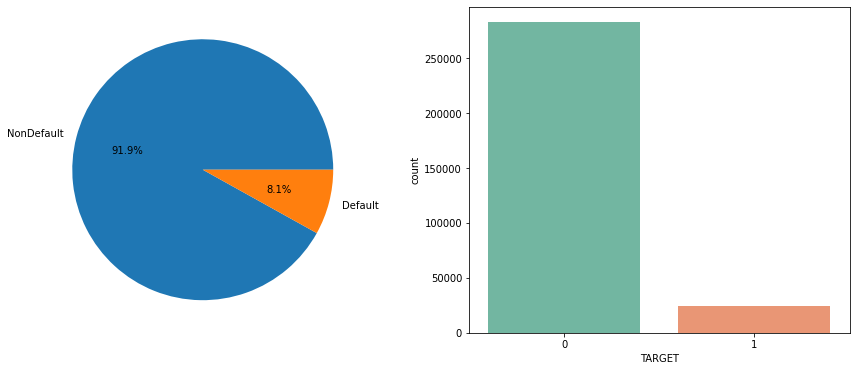

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.pie(data, labels=keys, autopct='%.1f%%')
plt.subplot(122)
sns.countplot(x='TARGET',data=inp0, palette = 'Set2')

plt.show()

### Insight:

Application data is highly imbalanced. Default population is 8.1 % and non-default population is 91.9% and Imbalance Ratio is 11.3

# Univariate analysis

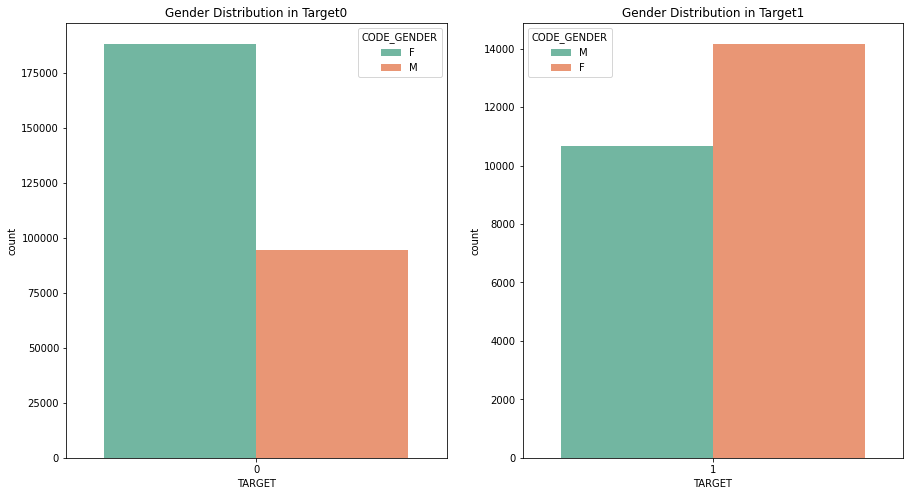

In [83]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

In [84]:
#inp0.groupby('CODE_GENDER')['Target'].value_counts(normalize=True)
100*Target0['CODE_GENDER'].value_counts(normalize=True)

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

In [85]:
100*Target1['CODE_GENDER'].value_counts(normalize=True)

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

Text(0.5, 1.0, 'Gender Distribution in Target')

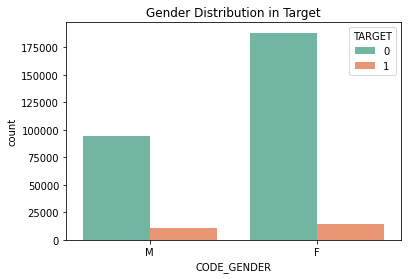

In [86]:
sns.countplot(x='CODE_GENDER',hue='TARGET',data=inp0, palette = 'Set2')
plt.title("Gender Distribution in Target")

Calculate ratio of defaulter to non-defaulter by Gender

In [87]:
len(inp0.loc[inp0["TARGET"]==1][inp0['CODE_GENDER']=='F'])/len(inp0.loc[inp0["TARGET"]==0][inp0['CODE_GENDER']=='F'])

0.07525945124865893

In [88]:
len(inp0.loc[inp0["TARGET"]==1][inp0['CODE_GENDER']=='M'])/len(inp0.loc[inp0["TARGET"]==0][inp0['CODE_GENDER']=='M'])

0.11286598025507394

### Insights:

It seems like Female clients applied for loan higher compare to male clients.
66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters
57% Female clients are defaulters while 42% male clients are defaulters.
The ratio of defaulter to non-defaulter is very less in Female compare to Male


As above plots don't give clear picture on which group has higher default rate, we will try a different methodolgy:
We will be plotting 2 graphs:
1. We will plot the Categorical variables values grouped by target column
2. We will plot the perecentage of default customers out of all the categorical variables


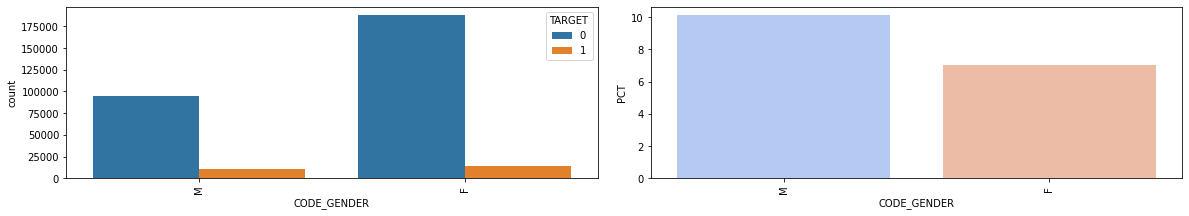

In [89]:
plt.figure(figsize=(20,60))
data_pct = inp0[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'], as_index=False).mean().sort_values(by='TARGET',ascending=False)
data_pct['PCT'] = data_pct['TARGET']*100


plt.subplot(10,2,i+i+1)
plt.subplots_adjust(wspace=0.1,hspace=1)
sns.countplot(data=inp0,x='CODE_GENDER',hue='TARGET')
plt.xticks(rotation=90)

plt.subplot(10,2,i+i+2)
sns.barplot(data=data_pct,x='CODE_GENDER',y='PCT',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

From the above graphs, we can say that out of all the Male clients ~10% of clients are defaulters. Default rate is higher 
in Male clients compare to female clients(~8%)
We will plot the similar graphs for other categorical variables

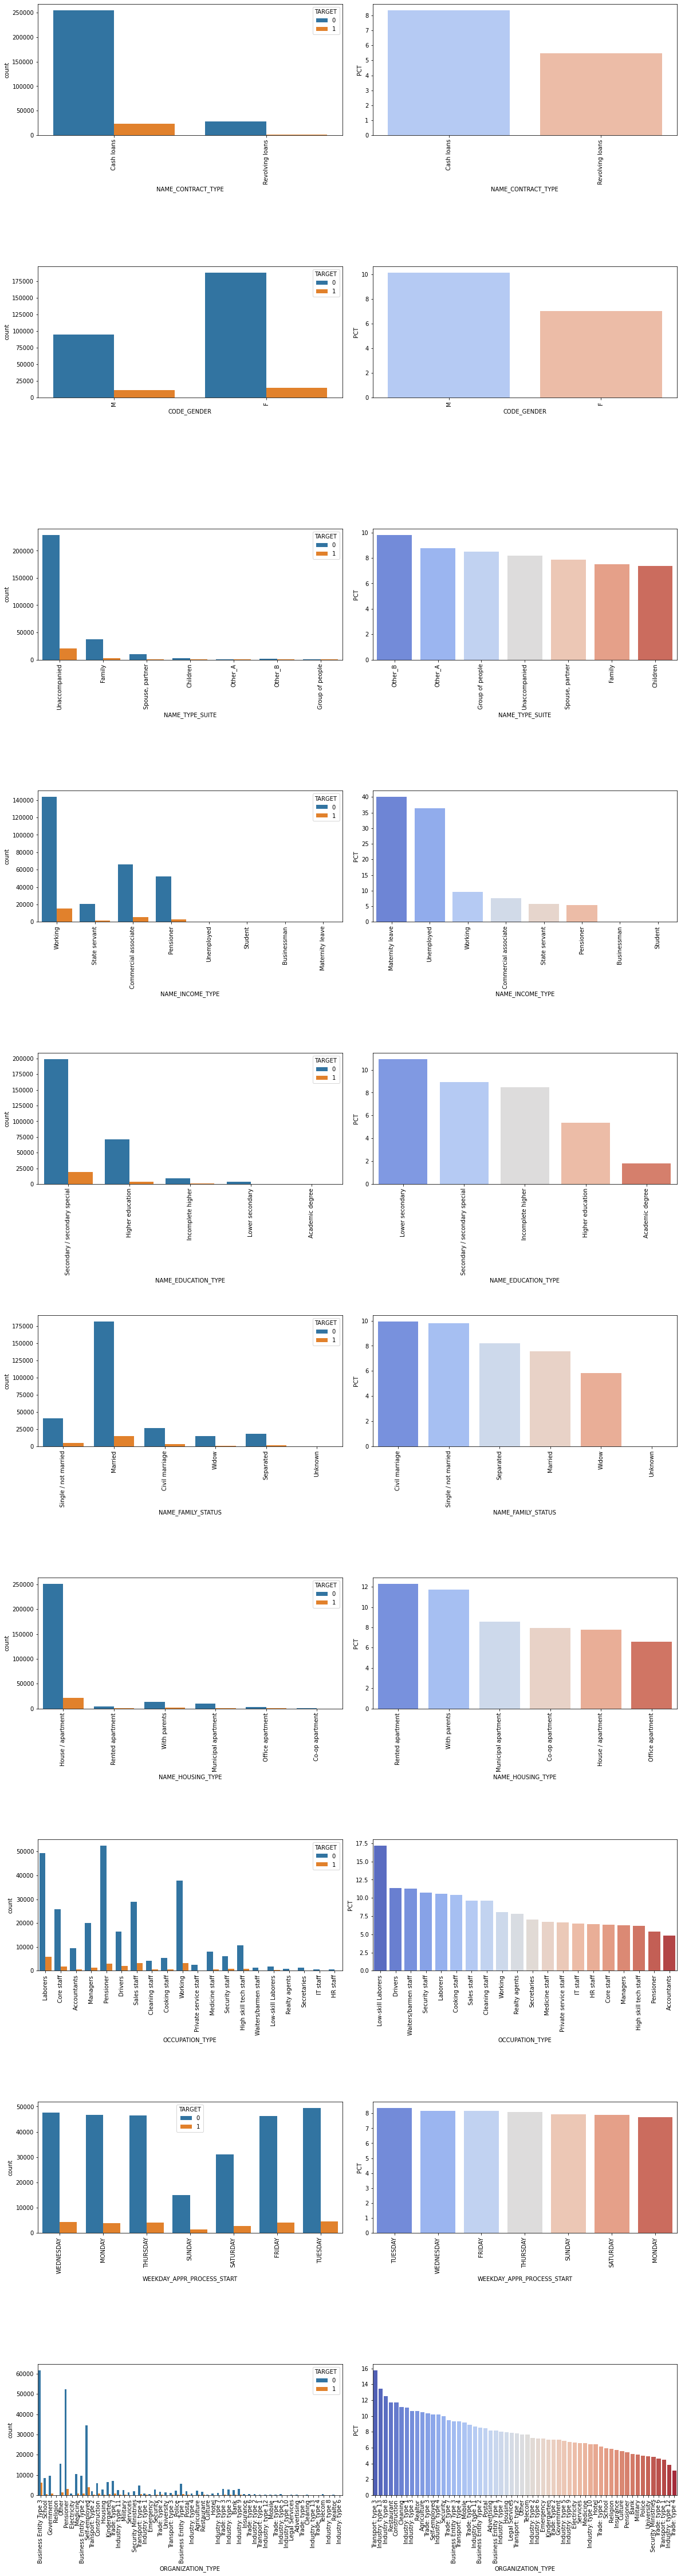

In [90]:

obj_var = inp0.select_dtypes(include=['object']).columns
plt.figure(figsize=(20,80))
for i, var in enumerate(obj_var):

    data_pct = inp0[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=inp0,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

We would do similar analysis on derived columns 'AMT_INCOME_TYPE', 'AGE_GROUP','AMT_CREDIT_TYPE'

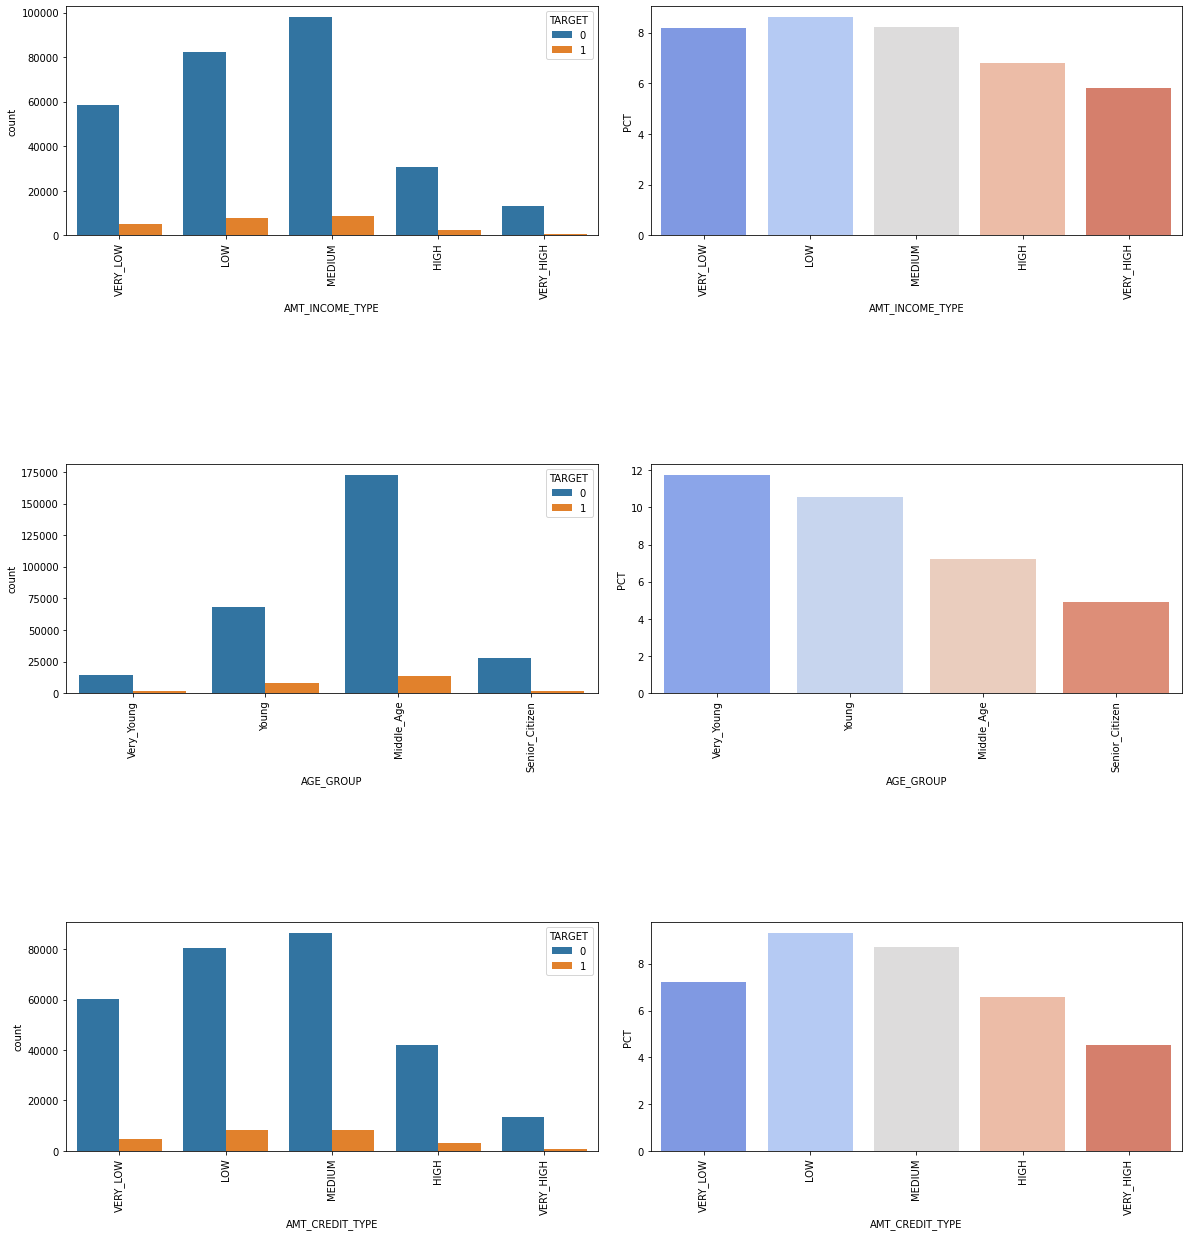

In [91]:
obj_var = ['AMT_INCOME_TYPE', 'AGE_GROUP','AMT_CREDIT_TYPE']
plt.figure(figsize=(20,80))
for i, var in enumerate(obj_var):

    data_pct = inp0[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=inp0,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

### Insights:

NAME_CONTRACT_TYPE -
     most of the customers have taken cash loan
     customers who have taken Revolving loans are less likely to default
 
CODE_GENDER -   
     most of the loans have been taken by female
     Default rate is higher in Male clients(~10%) compare to female clients(~8%)
 
 NAME_TYPE_SUITE -  
     unacompanied people had tanke most of the loans and the default rate is ~8.5%.
 
 NAME_INCOME_TYPE -  
     most of the loans are taken by working, commercial associates and pensioners with very less default rates
 
 NAME_EDUCATION_TYPE -  
     Higher education is the safest segment to give the loan with a default rate of less than 5%
 
 NAME_FAMILY_STATUS - 
     Highest loan taker are Married people with less default rate(~8%)
 
 NAME_HOUSING_TYPE -  
     People having house/appartment are safe to give the loan with default rate of ~8%
 
 OCCUPATION_TYPE -  
     Low-Skill Laboreres and drivers are highest defaulters
     Pensioners are less defaulters
     Accountants, Core staff,High skill tech staff and Managers are safer to target
     
 ORGANIZATION_TYPE -  
     Transport type 3 highest defaulter
     Self Employed could be targetted with default rate around 10 %
     
 AMT_INCOME_TYPE -
     Medium income group are safer to target
     
 AGE_GROUP -
     Deafult rate is decreasing with age. 
     Middle age clients are less likely to default.
     
 AMT_CREDIT_TYPE -
     Very low credit type are safe to target

In [92]:

obj_var = inp0.select_dtypes(include=['float64','int64']).columns

Default = inp0[obj_var].loc[inp0["TARGET"]==1]

Non_Default = inp0[obj_var].loc[inp0["TARGET"]==0]

# Top 10 Correlations

In [93]:
#Default.corr()

corr_matrix = abs(Default.corr())

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

default_top10 = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))


In [94]:
default_top10.head(10)

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998270
AMT_CREDIT                  AMT_GOODS_PRICE                0.982783
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885484
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.869016
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752295
AMT_CREDIT                  AMT_ANNUITY                    0.752195
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497937
dtype: float64

In [95]:
corr_matrix2 = abs(Non_Default.corr())

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

non_default_top10 = (corr_matrix2.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
non_default_top10.head(10)

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998510
AMT_CREDIT                  AMT_GOODS_PRICE                0.987022
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                CNT_FAM_MEMBERS                0.878571
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859371
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                 AMT_GOODS_PRICE                0.776400
AMT_CREDIT                  AMT_ANNUITY                    0.771276
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT           0.539005
dtype: float64

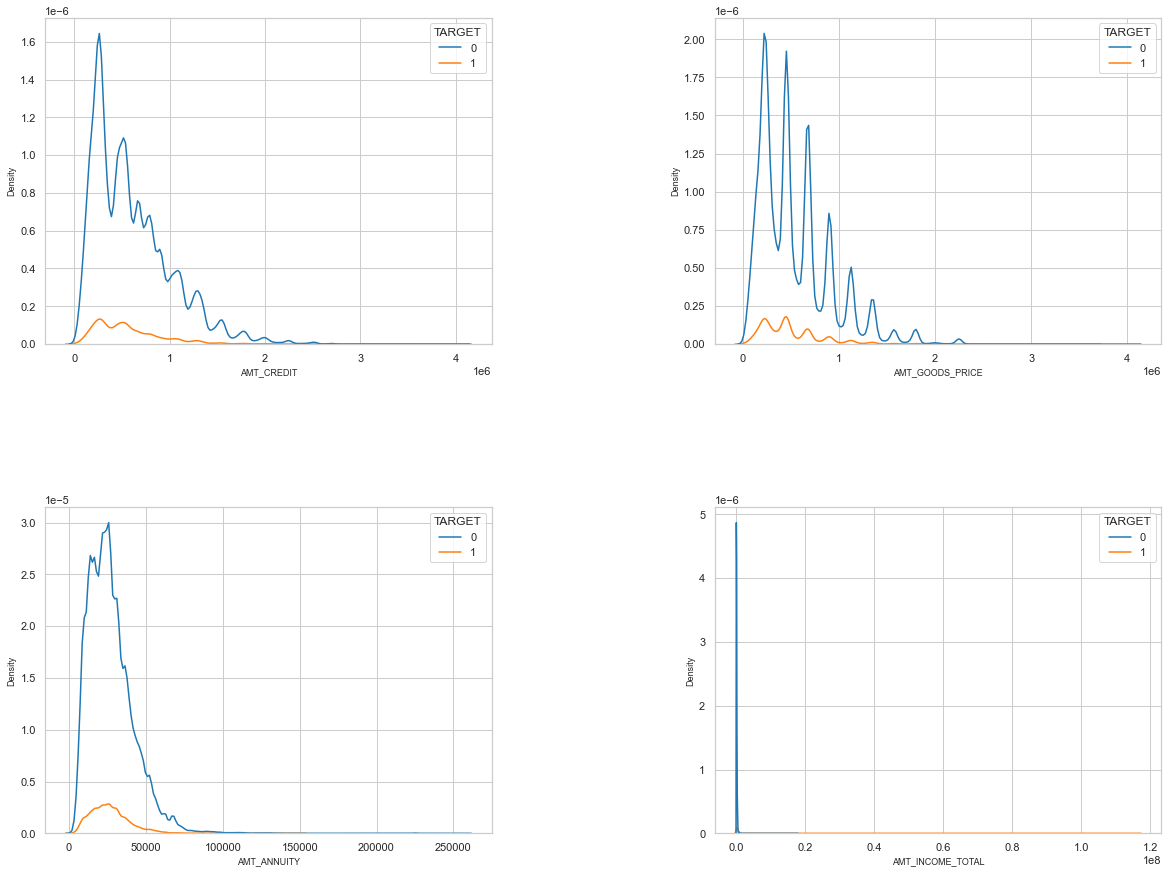

In [98]:
flow = ['AMT_CREDIT','AMT_GOODS_PRICE', 'AMT_ANNUITY','AMT_INCOME_TOTAL']
plt.figure(figsize = (20, 15))

for i, col in enumerate(flow):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=inp0,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
inp0.head()

# Bivariate Analysis

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

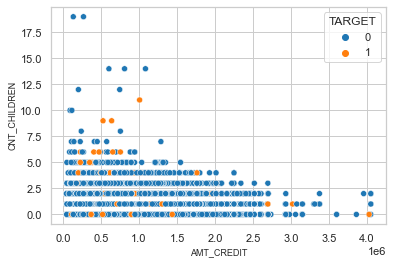

In [99]:
sns.scatterplot(data=inp0,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

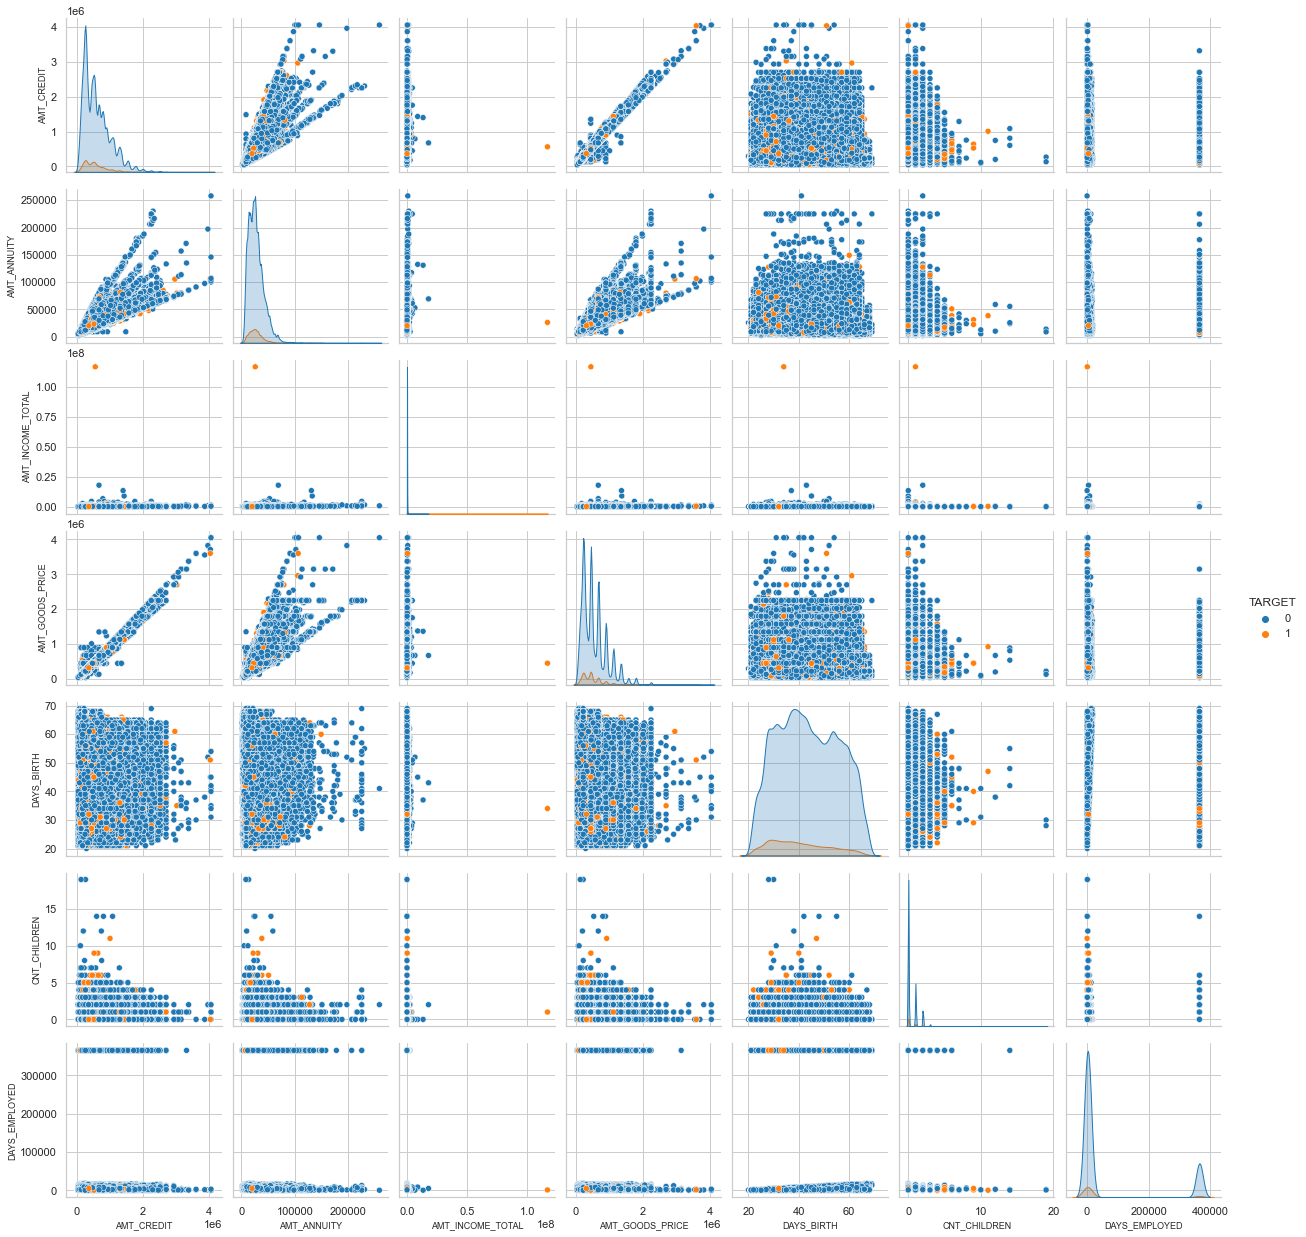

In [103]:
amt_var = inp0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']]
sns.pairplot(data=amt_var,hue='TARGET')



### Insights:

1. AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
2. people having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, coudl turn out to be defaulters. we can target income below 1 million and loan maount greater than 1.5 million
3.  people having children 1 to less than 5 are safer to give the loan
4.  People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment)


# Analysis on merged dataframe of Previous_Application_data and Application data

We will join these two dataset on customer ID SK_ID_CURR and do the analysis

In [ ]:

merged_df = pd.merge(inp0,inp1,how='inner',on='SK_ID_CURR')
merged_df.head()

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

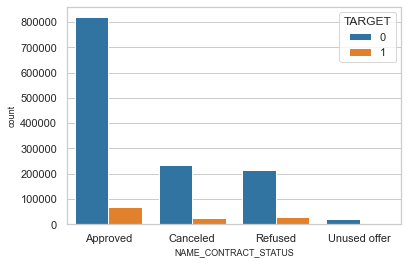

In [117]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

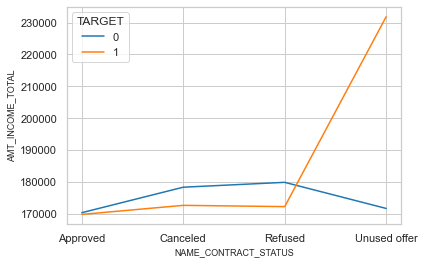

In [111]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [115]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2


,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


### Insights:

1. most of the applications which were previously either canceled or refused 80-90% of them are repayer in the current data
2. offers which were unused previously, now have maximum number of defaulters despite of having high income band customers


# RECOMMENDATIONS

**Following are the strong indicators of default**:
1. NAME_HOUSING_TYPE - People living in rented apartment
2. NAME_FAMILY_STATUS - civil marriages, single/not married
3. NAME_EDUCATION_TYPE - Lower secondary
4. OCCUPATION_TYPE - Low-Skill Laboreres and drivers
5. offers prev. unused and high income customer should be avoided
6. CNT_CHILDREN - Customers withmore than 5 children
7. NAME_INCOME_TYPE - Maternity Leave, students, unemployed


**Following clients should be targeted**:
1. NAME_HOUSING_TYPE - People living in their own apartment
2. NAME_FAMILY_STATUS - Married
3. NAME_EDUCATION_TYPE - Higher education
4. CODE_GENDER - FEMALE
5. OCCUPATION_TYPE - Accountants, Core staff,High skill tech staff , Managers
6. Offers prev. Cancelled or refused
7. NAME_INCOME_TYPE - Working and Pensioners
